In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamidrezaamin","key":"d15526e38f947f4469926effee3832aa"}'}

In [ ]:
import os

# Create the .kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Rename and move the file to the proper location
!mv "kaggle.json" /root/.kaggle/kaggle.json

# Set file permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
# Install the Kaggle CLI
!pip install -q kaggle

# Download the competition dataset
!kaggle competitions download -c dogs-vs-cats

 96% 778M/812M [00:04<00:00, 160MB/s]
100% 812M/812M [00:04<00:00, 201MB/s]


In [ ]:
# Unzip the main dataset
!unzip dogs-vs-cats.zip -d /content

Archive:  dogs-vs-cats.zip
  inflating: /content/sampleSubmission.csv  
  inflating: /content/test1.zip      
  inflating: /content/train.zip      


In [ ]:
# Unzip the inner train and test archives
!unzip -q /content/train.zip -d /content/train
!unzip -q /content/test1.zip -d /content/test

In [ ]:
import shutil
# Create the original_dataset_dir
original_dataset_dir = '/content/original_dataset_dir'
os.makedirs(original_dataset_dir, exist_ok=True)

# Move the train and test folders
shutil.move('/content/train', os.path.join(original_dataset_dir, 'train'))
shutil.move('/content/test', os.path.join(original_dataset_dir, 'test'))

'/content/original_dataset_dir/test'

In [ ]:

# Fix train folder
nested_train = '/content/original_dataset_dir/train/train'
correct_train = '/content/original_dataset_dir/train'

if os.path.exists(nested_train):
    for filename in os.listdir(nested_train):
        shutil.move(os.path.join(nested_train, filename), correct_train)
    os.rmdir(nested_train)  # remove the empty 'train' folder

# Fix test folder
nested_test = '/content/original_dataset_dir/test/test1'
correct_test = '/content/original_dataset_dir/test'

if os.path.exists(nested_test):
    for filename in os.listdir(nested_test):
        shutil.move(os.path.join(nested_test, filename), correct_test)
    os.rmdir(nested_test)  # remove the empty 'test1' folder



In [ ]:
# check the number of cats and dogs in train folder
train_dir = '/content/original_dataset_dir/train'

cat_images = [f for f in os.listdir(train_dir) if f.startswith('cat')]
dog_images = [f for f in os.listdir(train_dir) if f.startswith('dog')]

print(f"Number of cat images: {len(cat_images)}")
print(f"Number of dog images: {len(dog_images)}")


Number of cat images: 12500
Number of dog images: 12500


In [ ]:
# Create the base_dir
base_dir = '/content/base_dir'
os.makedirs(base_dir, exist_ok=True)

In [ ]:

# Define the base directory
base_dir = '/content/base_dir'
os.makedirs(base_dir, exist_ok=True)  # Create base_dir if it doesn't exist

# Define the subfolders to create
subfolders = ['train', 'test', 'validation']

# Loop and create each subfolder inside base_dir
for folder in subfolders:
    path = os.path.join(base_dir, folder)
    os.makedirs(path, exist_ok=True)
    print(f"Created: {path}")


Created: /content/base_dir/train
Created: /content/base_dir/test
Created: /content/base_dir/validation


In [ ]:

# Define base directory
base_dir = '/content/base_dir'
os.makedirs(base_dir, exist_ok=True)

# Top-level subfolders
top_subfolders = ['train', 'test', 'validation']

# Sub-subfolders to create inside each top-level folder
class_folders = ['cat', 'dog']

# Create the full directory structure
for sub in top_subfolders:
    sub_path = os.path.join(base_dir, sub)
    os.makedirs(sub_path, exist_ok=True)

    for class_folder in class_folders:
        class_path = os.path.join(sub_path, class_folder)
        os.makedirs(class_path, exist_ok=True)
        print(f"Created: {class_path}")


Created: /content/base_dir/train/cat
Created: /content/base_dir/train/dog
Created: /content/base_dir/test/cat
Created: /content/base_dir/test/dog
Created: /content/base_dir/validation/cat
Created: /content/base_dir/validation/dog


In [ ]:

# Source and target directories
source_dir = '/content/original_dataset_dir/train'
target_base_dir = '/content/base_dir/train'

# List all files in the source directory
all_filenames = os.listdir(source_dir)

# Filter out cat and dog images
cat_filenames = [f for f in all_filenames if f.startswith('cat')]
dog_filenames = [f for f in all_filenames if f.startswith('dog')]

# Sort and select the first 1000 of each
cat_filenames = sorted(cat_filenames)[:1000]
dog_filenames = sorted(dog_filenames)[:1000]

# Copy cat images
for fname in cat_filenames:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(target_base_dir, 'cat', fname)
    shutil.copyfile(src, dst)

# Copy dog images
for fname in dog_filenames:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(target_base_dir, 'dog', fname)
    shutil.copyfile(src, dst)

print("Copied 1000 cat and 1000 dog images to base_dir/train/")


Copied 1000 cat and 1000 dog images to base_dir/train/


In [ ]:


# Define source and destination paths
source_dir = '/content/original_dataset_dir/train'
validation_dir = '/content/base_dir/validation'

# List all files in the source directory
all_filenames = os.listdir(source_dir)

# Filter cat and dog images
cat_filenames = sorted([f for f in all_filenames if f.startswith('cat')])
dog_filenames = sorted([f for f in all_filenames if f.startswith('dog')])

# Select images from index 1001 to 2000 (i.e., next 1000 images)
cat_val_filenames = cat_filenames[1000:2000]
dog_val_filenames = dog_filenames[1000:2000]

# Copy cat validation images
for fname in cat_val_filenames:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(validation_dir, 'cat', fname)
    shutil.copyfile(src, dst)

# Copy dog validation images
for fname in dog_val_filenames:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(validation_dir, 'dog', fname)
    shutil.copyfile(src, dst)

print("Copied 1000 cat and 1000 dog validation images to base_dir/validation/")


Copied 1000 cat and 1000 dog validation images to base_dir/validation/


In [ ]:
import os
import shutil

# Define source and target directories
source_dir = '/content/original_dataset_dir/test'
target_dir = '/content/base_dir/test'

# List and sort image files (to ensure consistent order like 1.jpg, 2.jpg, ...)
all_test_images = sorted(os.listdir(source_dir))[:1000]

# Copy first 1000 images
for fname in all_test_images:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(target_dir, fname)
    shutil.copyfile(src, dst)

print("Copied first 1000 test images to base_dir/test/")


Copied first 1000 test images to base_dir/test/


These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Let's take a look at our augmented images:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

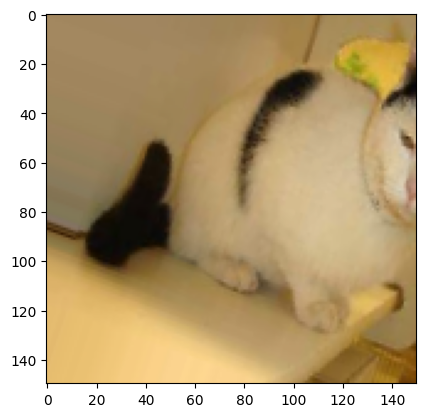

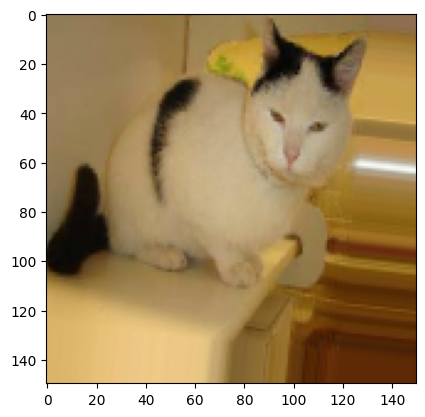

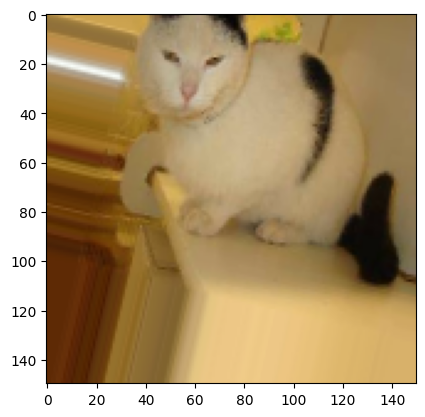

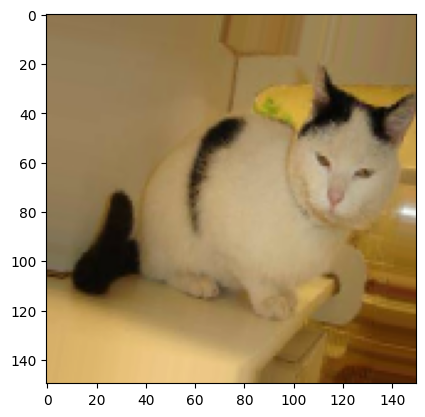

In [ ]:
# This is module with image processing utilities

import keras.utils as image
import matplotlib.pyplot as plt

train_cats_dir = '/content/base_dir/train/cat'

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[68]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting.

In [ ]:
# Import necessary Keras modules
from keras import layers, models, optimizers


# Build a Convolutional Neural Network (CNN)
model = models.Sequential()

# First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))  # Input shape must match image size

# First max-pooling layer to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps into a 1D vector
model.add(layers.Flatten())

# Dropout to reduce overfitting (drops 50% of the neurons randomly)
model.add(layers.Dropout(0.5))

# Dense fully connected layer with 512 units and ReLU activation
model.add(layers.Dense(512, activation='relu'))

# Output layer with 1 unit and sigmoid activation for binary classification (cat vs dog)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and RMSprop optimizer
model.compile(
    loss='binary_crossentropy',               # For binary classification
    optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use RMSprop with a low learning rate
    metrics=['acc']                           # Track accuracy during training
)

# View the model summary (optional, useful in Jupyter)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Point to the correct directories
train_dir = '/content/base_dir/train'
validation_dir = '/content/base_dir/validation'

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - acc: 0.5012 - loss: 0.6926

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step - acc: 0.5014 - loss: 0.6926 - val_acc: 0.5855 - val_loss: 0.6843
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - acc: 0.5463 - loss: 0.6846 - val_acc: 0.5660 - val_loss: 0.6745
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - acc: 0.6048 - loss: 0.6676 - val_acc: 0.5825 - val_loss: 0.6687
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - acc: 0.5766 - loss: 0.6721 - val_acc: 0.6025 - val_loss: 0.6558
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - acc: 0.6006 - loss: 0.6513 - val_acc: 0.6170 - val_loss: 0.6508
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - acc: 0.6131 - loss: 0.6499 - val_acc: 0.6215 - val_loss: 0.6405
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - acc: 0.6359 - loss: 0.6394 - val_acc: 0.6250 - val_loss: 0.6383
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - acc: 0.6360 - loss: 0.6323 - val_acc: 0.6100 - val_loss: 0.6548
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s

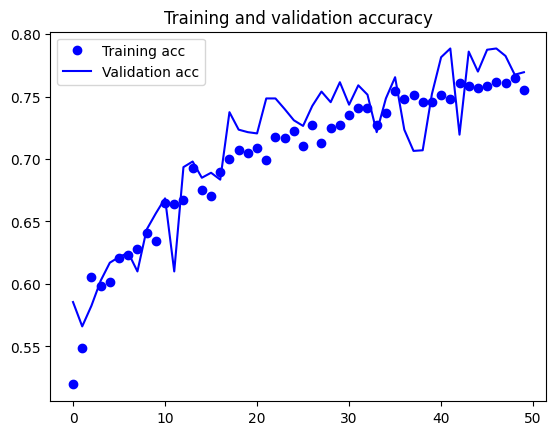

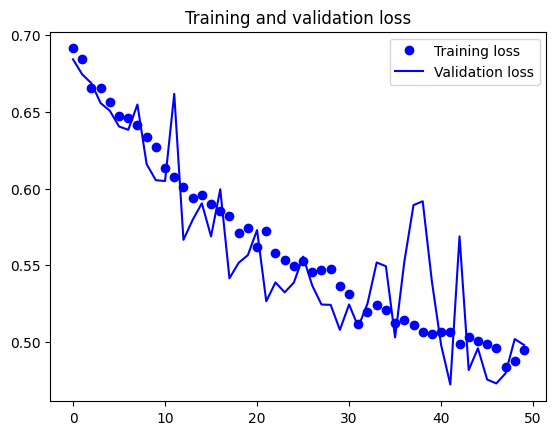

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()